<a href="https://colab.research.google.com/github/ROKR7381/DEMO_PURPOSE/blob/main/Monthly_MIlk_prod_prophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install prophet

In [50]:
import pandas as pd
import numpy as np
import prophet
from prophet import Prophet
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [51]:
df = pd.read_csv('monthly-milk-production-pounds.csv')
df.head()

,Month,Monthly milk production: pounds per cow. Jan 62 ? Dec 75
0,1962-01,589.0
1,1962-02,561.0
2,1962-03,640.0
3,1962-04,656.0
4,1962-05,727.0


In [52]:
df.isnull().sum()

Month                                                       0
Monthly milk production: pounds per cow. Jan 62 ? Dec 75    1
dtype: int64

In [53]:
df.tail()

,Month,Monthly milk production: pounds per cow. Jan 62 ? Dec 75
164,1975-09,817.0
165,1975-10,827.0
166,1975-11,797.0
167,1975-12,843.0
168,Monthly milk production: pounds per cow. Jan 6...,NaN


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 2 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Month                                                     169 non-null    object 
 1   Monthly milk production: pounds per cow. Jan 62 ? Dec 75  168 non-null    float64
dtypes: float64(1), object(1)
memory usage: 2.8+ KB


In [55]:
df.drop(168,axis=0,inplace =True)

In [56]:
df.tail()

,Month,Monthly milk production: pounds per cow. Jan 62 ? Dec 75
163,1975-08,858.0
164,1975-09,817.0
165,1975-10,827.0
166,1975-11,797.0
167,1975-12,843.0


<Axes: >

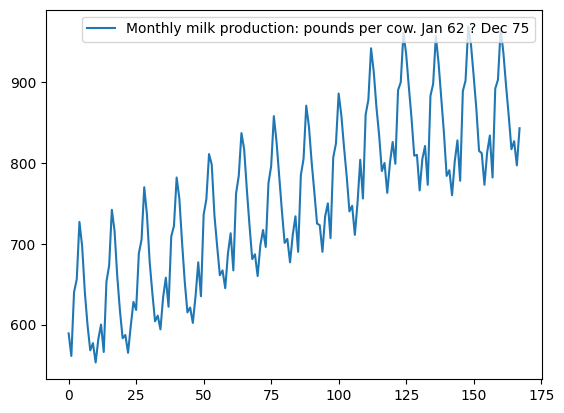

In [57]:
df.plot()

In [58]:
df.columns = ['ds','y']

In [59]:
df['ds'] = pd.to_datetime(df['ds'])

In [60]:
df.head()

,ds,y
0,1962-01-01,589.0
1,1962-02-01,561.0
2,1962-03-01,640.0
3,1962-04-01,656.0
4,1962-05-01,727.0


<Axes: >

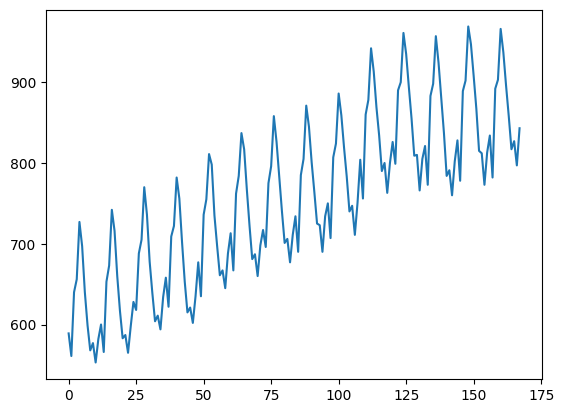

In [61]:
df['y'].plot()

In [20]:
df['y'].shift(1)

0        NaN
1      589.0
2      561.0
3      640.0
4      656.0
       ...  
163    896.0
164    858.0
165    817.0
166    827.0
167    797.0
Name: y, Length: 168, dtype: float64

In [62]:
df.head()

,ds,y
0,1962-01-01,589.0
1,1962-02-01,561.0
2,1962-03-01,640.0
3,1962-04-01,656.0
4,1962-05-01,727.0


<Axes: >

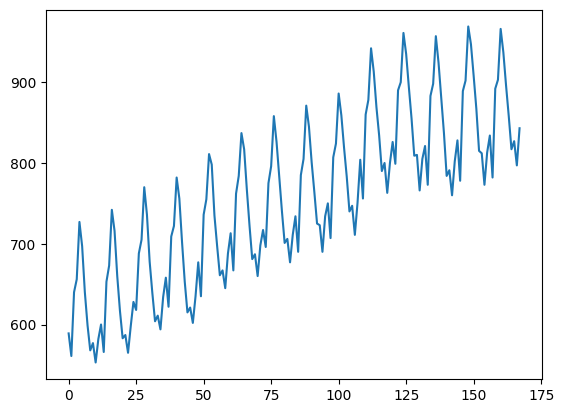

In [63]:
df['y'].plot()

Data is stationary now.

In [64]:
from prophet import Prophet

In [26]:
#help(prophet)

In [65]:
###Initialize the Model
model = Prophet()
model.fit(df)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpq3i4c5j5/razlgir1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpq3i4c5j5/1mzbr5cv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=22406', 'data', 'file=/tmp/tmpq3i4c5j5/razlgir1.json', 'init=/tmp/tmpq3i4c5j5/1mzbr5cv.json', 'output', 'file=/tmp/tmpq3i4c5j5/prophet_modelz6ddwl10/prophet_model-20230826141214.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:12:14 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:12:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [66]:
### Create future dates of 365 days
future_dates = model.make_future_dataframe(periods=365)

In [67]:
future_dates

,ds
0,1962-01-01
1,1962-02-01
2,1962-03-01
3,1962-04-01
4,1962-05-01
...,...
528,1976-11-26
529,1976-11-27
530,1976-11-28
531,1976-11-29


In [68]:
##Predictions
predictions= model.predict(future_dates)
predictions.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1962-01-01,606.800397,576.509140,596.894817,606.800397,606.800397,-20.104182,-20.104182,-20.104182,-20.104182,-20.104182,-20.104182,0.0,0.0,0.0,586.696215
1,1962-02-01,608.531068,536.180315,555.165397,608.531068,608.531068,-62.541591,-62.541591,-62.541591,-62.541591,-62.541591,-62.541591,0.0,0.0,0.0,545.989477
2,1962-03-01,610.094254,631.010549,651.353579,610.094254,610.094254,31.414308,31.414308,31.414308,31.414308,31.414308,31.414308,0.0,0.0,0.0,641.508563
3,1962-04-01,611.824925,648.393877,668.298519,611.824925,611.824925,46.722743,46.722743,46.722743,46.722743,46.722743,46.722743,0.0,0.0,0.0,658.547668
4,1962-05-01,613.499768,712.052140,731.904165,613.499768,613.499768,108.044445,108.044445,108.044445,108.044445,108.044445,108.044445,0.0,0.0,0.0,721.544213


In [69]:
predictions[['ds','yhat','yhat_upper']].tail()

,ds,yhat,yhat_upper
528,1976-11-26,815.564635,826.823197
529,1976-11-27,818.802192,830.592939
530,1976-11-28,822.223734,833.908648
531,1976-11-29,825.765973,837.076965
532,1976-11-30,829.358381,840.511932


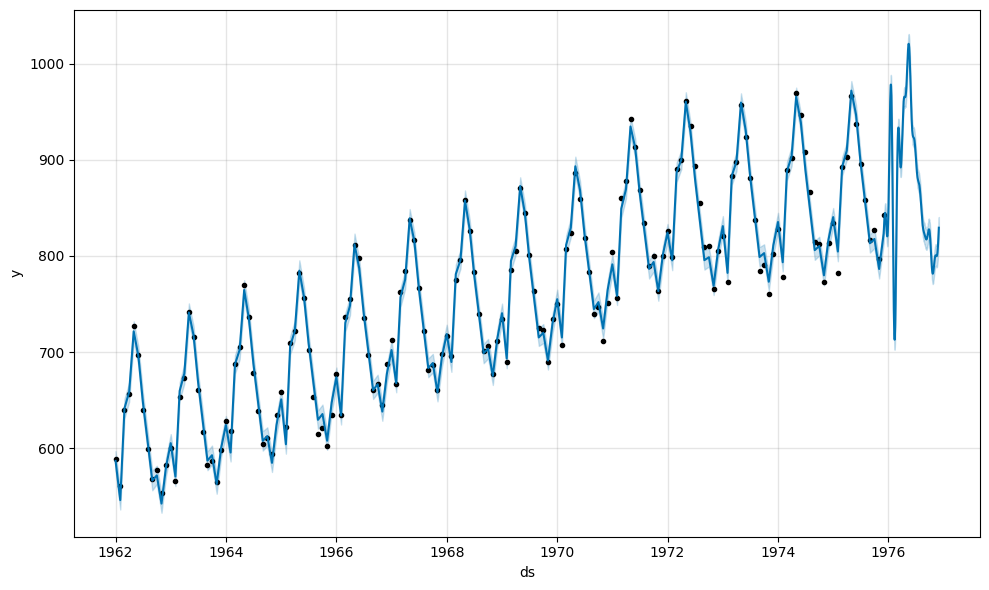

In [70]:
##PLot the predicted value
model.plot(predictions);

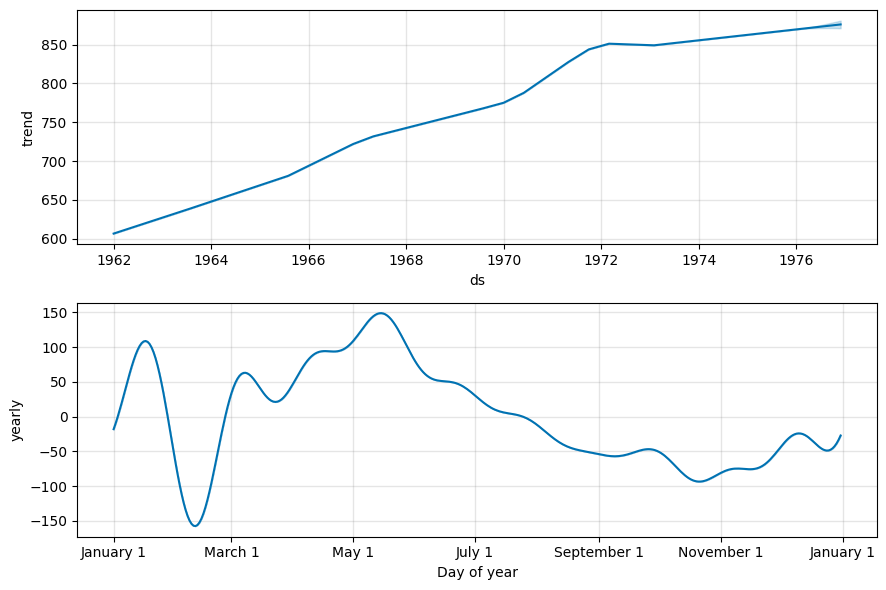

In [71]:
##Visualising each Componenets
model.plot_components(predictions);

In [72]:
from prophet.diagnostics import cross_validation

In [73]:
df_cv=cross_validation(model,horizon ='365 days',period='180 days',initial='1095 days')

INFO:prophet:Making 21 forecasts with cutoffs between 1965-01-22 00:00:00 and 1974-12-01 00:00:00


  0%|          | 0/21 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpq3i4c5j5/5jf0bnfe.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpq3i4c5j5/r1_xi7xl.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=83070', 'data', 'file=/tmp/tmpq3i4c5j5/5jf0bnfe.json', 'init=/tmp/tmpq3i4c5j5/r1_xi7xl.json', 'output', 'file=/tmp/tmpq3i4c5j5/prophet_modeltbvnz4_4/prophet_model-20230826141342.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
14:13:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:14:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpq3i4c5j5/mot6wh0z.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpq3i4c5j5/p46qkbrz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local

In [74]:
df_cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,1965-02-01,624.084339,622.167264,626.221242,622.0,1965-01-22
1,1965-03-01,706.123606,699.669843,712.831806,709.0,1965-01-22
2,1965-04-01,720.831356,708.617762,733.776323,722.0,1965-01-22
3,1965-05-01,787.272103,767.367200,807.329766,782.0,1965-01-22
4,1965-06-01,755.481664,726.181701,783.449089,756.0,1965-01-22


In [75]:
from prophet.diagnostics import performance_metrics
df_performance = performance_metrics(df_cv)
df_performance

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,38 days,251.056263,15.844755,12.133885,0.015532,0.013668,0.015520,0.36
1,41 days,249.109766,15.783212,12.055315,0.015468,0.013668,0.015455,0.36
2,42 days,264.229555,16.255139,12.522889,0.016118,0.014141,0.016113,0.36
3,43 days,266.108238,16.312824,12.770846,0.016512,0.014141,0.016512,0.36
4,46 days,252.652615,15.895050,12.537552,0.016209,0.014141,0.016193,0.36
...,...,...,...,...,...,...,...,...
180,357 days,869.701299,29.490699,21.965455,0.027521,0.017563,0.027146,0.44
181,360 days,677.331186,26.025587,18.902486,0.023353,0.014095,0.023145,0.48
182,361 days,664.804082,25.783795,18.511014,0.022956,0.013880,0.022763,0.48
183,362 days,648.115939,25.458121,17.804907,0.022146,0.013165,0.021965,0.52


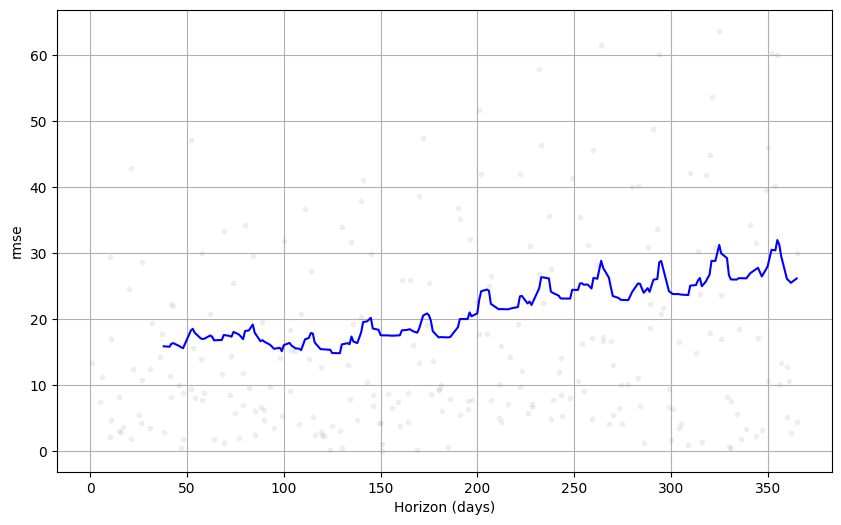

In [76]:
from prophet.plot import plot_cross_validation_metric
fig=plot_cross_validation_metric(df_cv,metric='rmse')

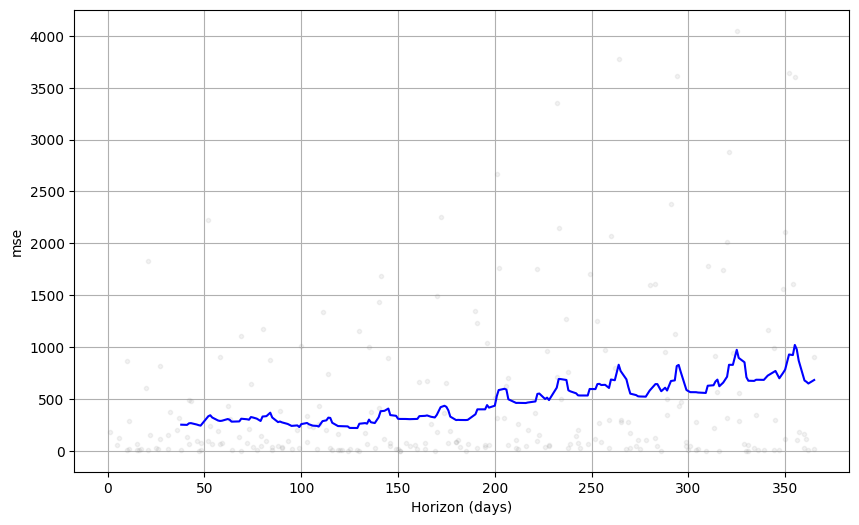

In [77]:
from prophet.plot import plot_cross_validation_metric
fig=plot_cross_validation_metric(df_cv,metric='mse')